# Questão 1
#### Crie  um sinal contínuo, com frequência de 20. e aplique sob o mesmo, transformada de fourier , filtragem e análise espectral. Depois demonstre graficamente o comportamento desse sinal.

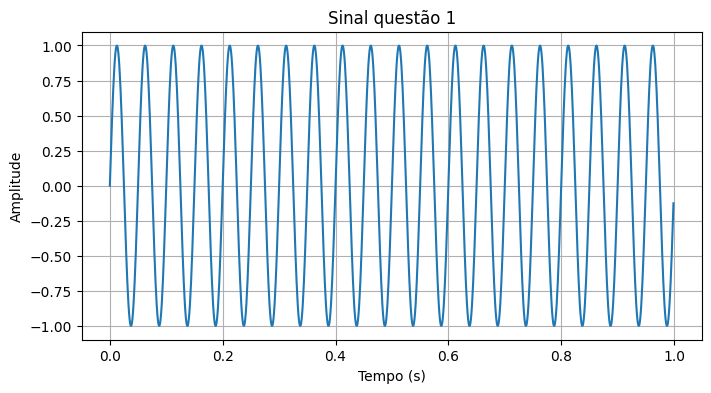

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Criando o Sinal Contínuo
def criar_sinal_continuo(freq, duracao, taxa_amostragem) :    
    t = np.linspace(0,duracao, int(duracao*taxa_amostragem), endpoint=False)
    sinal = np.sin(2 * np.pi * freq * t)
    return t, sinal

frequencia = 20 #Frequencia pedida na questão
duracao_sinal = 1 # Em segundos a duração do sinal proposta
taxa_amostragem = 1000 # Taxa de amostragem em Hz (Número de pontos por segundo)

t, sinal = criar_sinal_continuo(frequencia, duracao_sinal, taxa_amostragem)
#Sinal a ser utilizado
plt.figure(figsize=(8,4))
plt.plot(t, sinal)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal questão 1')
plt.grid(True)
plt.show()

# Aplicando Transformada de Fourier no sinal criado

C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


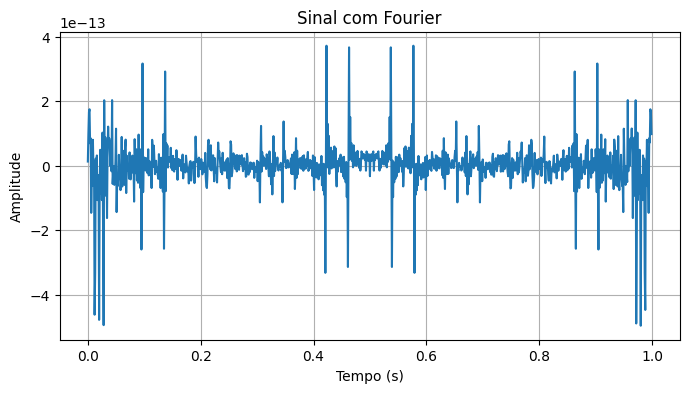

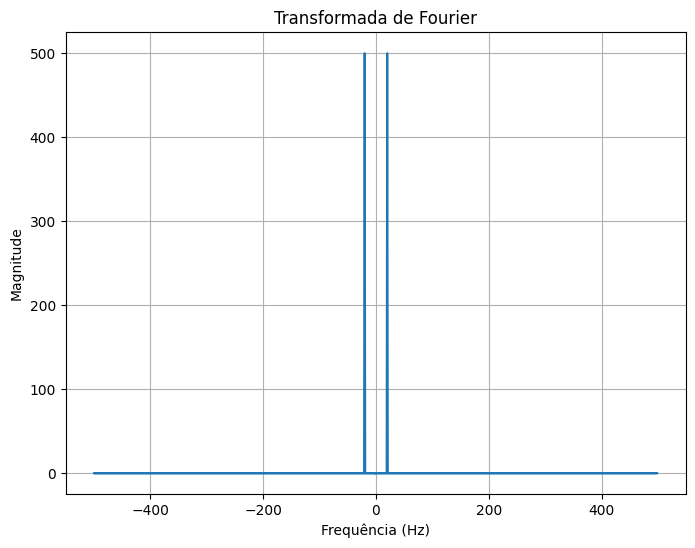

In [3]:
#Aplicando a Transformada de Fourier
transformada = np.fft.fft(sinal)
frequencias = np.fft.fftfreq(len(t), t[1] - t[0])

# Plotar o gráfico 
plt.figure(figsize=(8,4))
plt.plot(t, transformada)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal com Fourier')
plt.grid(True)
plt.show()

# Plotar a magnitude da Transformada de Fourier
plt.figure(figsize=(8, 6))
plt.plot(frequencias, np.abs(transformada))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Transformada de Fourier')
plt.grid(True)
plt.show()

# Aplicando filtragem no sinal

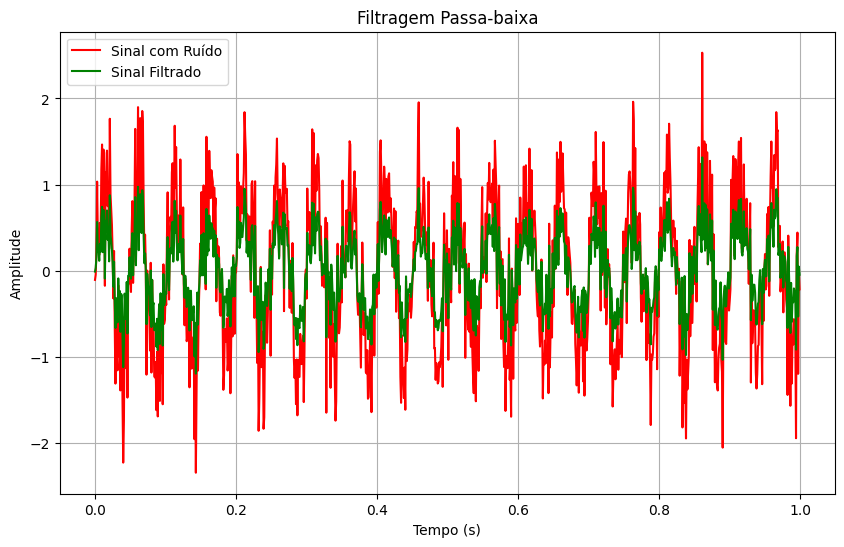

In [4]:
# Adicionar ruído ao sinal inicial
ruido = 0.5 * np.random.randn(len(t))
sinal_com_ruido =  sinal + ruido

# Filtragem Passa-Baixa
frequencia_corte = 15 # Frequencia de corte do filtro
transformada_filtragem = np.fft.fft(sinal_com_ruido)
transformada_filtragem[frequencias > frequencia_corte] = 0
sinal_filtrado = np.fft.ifft(transformada_filtragem)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(t, sinal_com_ruido, 'r', label='Sinal com Ruído')
plt.plot(t, sinal_filtrado, 'g', label='Sinal Filtrado')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Filtragem Passa-baixa')
plt.grid(True)
plt.show()

# Aplicando Análise Espectral no Sinal 

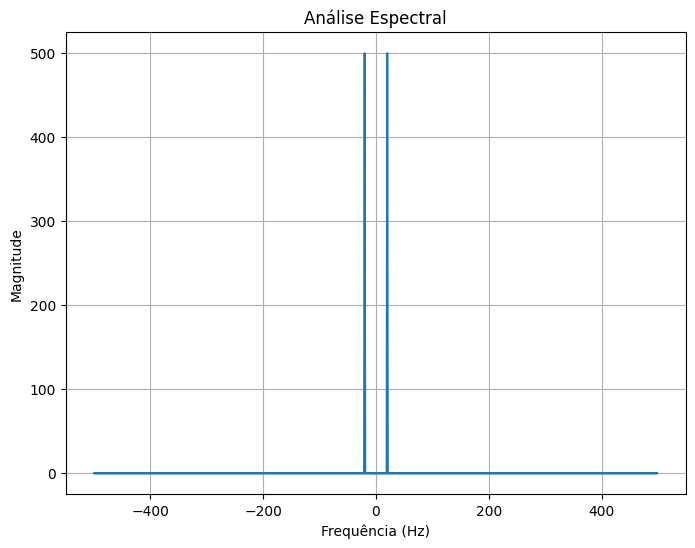

In [5]:
# Transformada de Fourier e análise espectral
transformada_analise_espectral = np.fft.fft(sinal)
frequencias_analise_espectral = np.fft.fftfreq(len(t), t[1] - t[0])
espectro = np.abs(transformada)
# Plotar o espectro de frequência

plt.figure(figsize = (8,6))
plt.plot(frequencias_analise_espectral, espectro)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Análise Espectral')
plt.grid(True)
plt.show()

# Questão 2

#### Com base na aula aplique os métodos necessários para aperfeiçoar as imagens abaixo: (Atualizar caminho das imagens quando for utilizar)


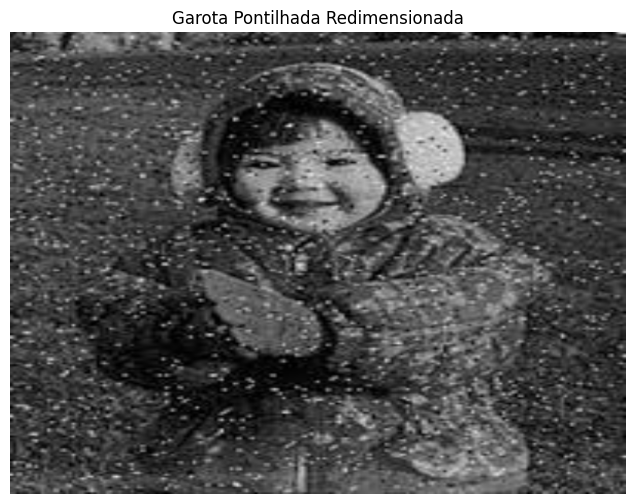

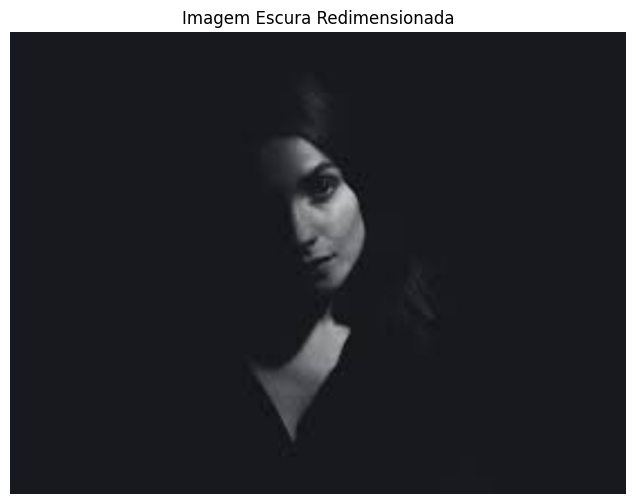

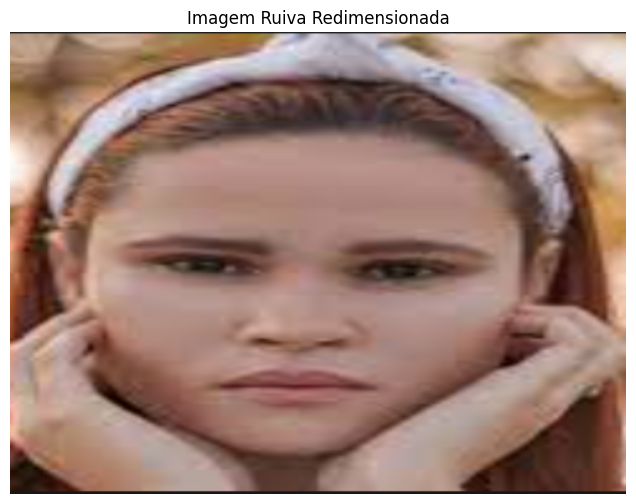

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Imagens
# Atualizar Caminho das imagens 
caminho_garota_pontilhada = "/Users/Carlos Eduardo/Desktop/Curso-Lapisco/curso-lapisco/Aula_06/img/menina_pontos_brancos.jpg"
garota_pontilhada = cv2.imread(caminho_garota_pontilhada)
caminho_imagem_escura = "/Users/Carlos Eduardo/Desktop/Curso-Lapisco/curso-lapisco/Aula_06/img/imagem_escura.jpg"
imagem_escura = cv2.imread(caminho_imagem_escura)
caminho_ruiva = "/Users/Carlos Eduardo/Desktop/Curso-Lapisco/curso-lapisco/Aula_06/img/ruiva.png"
ruiva = cv2.imread(caminho_ruiva)


# Redimensionar a imagem
novo_tamanho = (800, 600)
garota_pontilhada_redimensionada = cv2.resize(garota_pontilhada, novo_tamanho)
image_escura_redimensionada = cv2.resize(imagem_escura, novo_tamanho)
ruiva_redimensionada = cv2.resize(ruiva, novo_tamanho)

# Plotar a imagem redimensionada
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(garota_pontilhada_redimensionada, cv2.COLOR_BGR2RGB))
plt.title("Garota Pontilhada Redimensionada")
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_escura_redimensionada, cv2.COLOR_BGR2RGB))
plt.title("Imagem Escura Redimensionada")
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(ruiva_redimensionada, cv2.COLOR_BGR2RGB))
plt.title("Imagem Ruiva Redimensionada")
plt.axis("off")
plt.show()

# Tentando otimizar a imagem da garota pontilhada

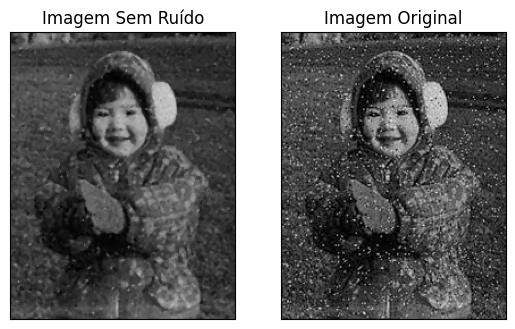

In [53]:
imagem_sem_ruido = cv2.medianBlur(garota_pontilhada, 3)

# Plotar a imagem sem ruído
plt.subplot(121),plt.imshow(cv2.cvtColor(imagem_sem_ruido, cv2.COLOR_BGR2RGB)),plt.title('Imagem Sem Ruído')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(garota_pontilhada),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.show()



# Tentando otimizar a imagem escura

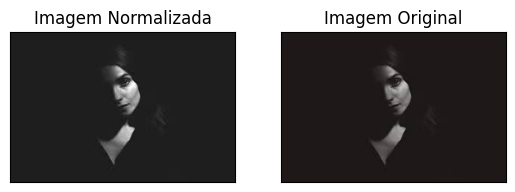

In [54]:
# Converter a imagem para tons de cinza
imagem_cinza = cv2.cvtColor(imagem_escura, cv2.COLOR_BGR2GRAY)

# Normalizar os valores de pixel para o intervalo [0, 1]
imagem_normalizada = cv2.normalize(imagem_cinza, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


plt.subplot(121),plt.imshow(imagem_normalizada, cmap="gray"),plt.title('Imagem Normalizada')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imagem_escura),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.show()


# Tentando otimizar a imagem da ruiva

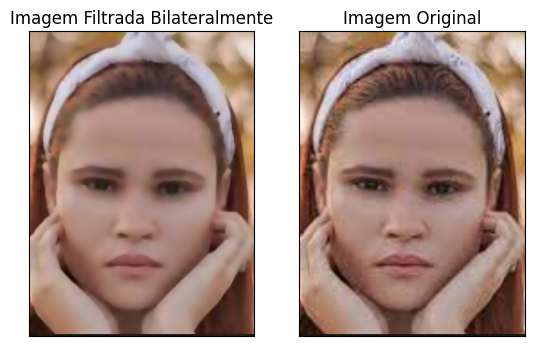

In [64]:
# Aplicar filtro de média
imagem_filtrada = cv2.bilateralFilter(ruiva,9,75,75)



plt.subplot(121),plt.imshow(cv2.cvtColor(imagem_filtrada, cv2.COLOR_BGR2RGB)),plt.title('Imagem Filtrada Bilateralmente')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(ruiva, cv2.COLOR_BGR2RGB)),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.show()
